# Hotel Booking Data Analysis

## 1. Introduction

This notebook analyzes hotel booking data to identify trends in bookings, cancellations, and guest demographics.

## 2. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Data

In [ ]:
# Reading the csv file as a dataframe
hb = pd.read_csv('/content/hotel_bookings.csv') 
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


## 4. Data Overview

In [ ]:
hb.shape

(119390, 32)

In [ ]:
# set the number of columns to display
pd.set_option('display.max_columns',32)

In [ ]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [ ]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hb.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
hb['hotel'].value_counts()
# The dataset is imbalanced because the city hotel and resort hotel doesn't contain equal number of records.

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
hb['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
hb['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
hb['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
hb['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
hb['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
hb['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [ ]:
hb['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

## 5. Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='hotel', ylabel='count'>

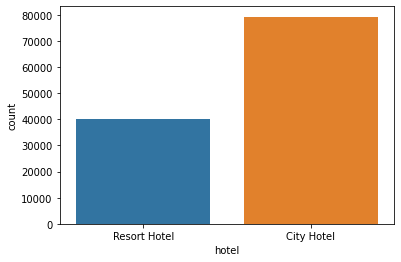

In [ ]:
sns.countplot(data=hb,x='hotel')

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

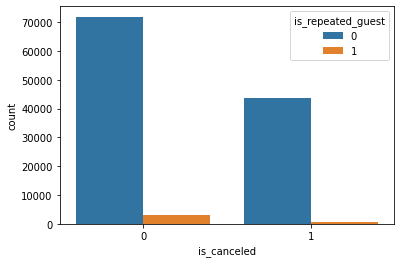

In [ ]:
sns.countplot(data=hb,x='is_canceled',hue='is_repeated_guest')
# hue means coloring

<AxesSubplot:xlabel='hotel', ylabel='count'>

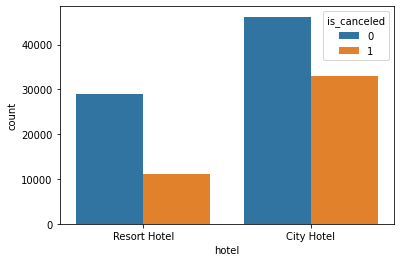

In [ ]:
sns.countplot(data=hb,x='hotel',hue='is_canceled')

**Data Preparation**

Missing Data

In [ ]:
hb.isnull().values.any()

True

In [ ]:
hb.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Replace missing values with 0
hb.fillna(0,inplace=True)

In [ ]:
hb.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Replace the meal values "Undefined" to "SC" because undefined and sc means no breakfast
hb.replace("Undefined","SC",inplace=True)

In [ ]:
hb['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [ ]:
Subset = hb[(hb['children']==0) & (hb['adults']==0) & (hb['babies']==0)]

In [ ]:
Subset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10-06-2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10-12-2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,01-04-2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,01-05-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,07-01-2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
Subset[['adults','babies','children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


In [ ]:
type(Subset)

pandas.core.frame.DataFrame

In [ ]:
Delete=(hb['children']==0) & (hb['adults']==0) & (hb['babies']==0)

In [ ]:
Delete

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [ ]:
type(Delete)

pandas.core.series.Series

In [ ]:
data = hb[~Delete]

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [ ]:
Subset1 = data[(data['children']==0) & (data['adults']==0) & (data['babies']==0)]

In [ ]:
Subset1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
data.shape

(119210, 32)

In [ ]:
119390-119210

180

In [ ]:
data.to_csv('Updated_Hotel_Booking.csv', index=False)

**Where do the Guests come from ?**

In [ ]:
guest_country = data[data['is_canceled']==0]['country'].value_counts().reset_index()
guest_country.columns = ['country','Number of guests']

In [ ]:
guest_country

,country,Number of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
total_guests = guest_country['Number of guests'].sum()
guest_country['Guests in %'] = round(guest_country['Number of guests'] / total_guests * 100, 2)

In [ ]:
guest_country

,country,Number of guests,Guests in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


In [ ]:
# Bar Chart
trace = go.Bar(
    x = guest_country['country'],
    y = guest_country['Number of guests'],
    marker = dict(color='#CD7F32')
)
data1 = [ trace]
layout = go.Layout(
    title = 'Guests by Country'
)
fig = go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [ ]:
# Map
map_guest = px.choropleth(guest_country,
                          locations=guest_country['country'],
                          color=guest_country['Number of guests'],
                          hover_name=guest_country['country'],
                          title='Home country of guests'
                          )
map_guest.show()

People from all over the world are staying in these two hotels.

Most guests are from Portugal and other countries in Europe.

50% of the guests are from Portugal, Great Britain and France.

In [ ]:
# Bar Chart
trace1 = go.Bar(
    x = guest_country['country'],
    y = guest_country['Guests in %'],
    marker = dict(color='#CD7F32')
)
data2 = [ trace1]
layout1 = go.Layout(
    title = 'Percentage of Guests by Country'
)
fig1 = go.Figure(data=data2, layout=layout1)
pyo.plot(fig1)

'temp-plot.html'

In [ ]:
# Map
map_guest1 = px.choropleth(guest_country,
                          locations=guest_country['country'],
                          color=guest_country['Guests in %'],
                          hover_name=guest_country['country'],
                          title='Home country of guests'
                          )
map_guest1.show()

**How does the price per night vary over the year?**

Mis-interpreting the data

In [ ]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [ ]:
resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,09-10-2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,09-10-2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,09-12-2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [ ]:
city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,07-03-2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,07-05-2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,07-05-2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,07-05-2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,07-05-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [ ]:
resort_hotel = resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel
# adr - average daily rate

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
city_hotel = city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
final = resort_hotel.merge(city_hotel, on='arrival_date_month')
final

,arrival_date_month,adr_x,adr_y
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
final.columns = ['month', 'price_for_resort', 'price_for_city']
final

,month,price_for_resort,price_for_city
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
!pip install sort-dataframeby-monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=0cd3021fb5a34cc18e73318106b51ca2bf7da0d11b0479d256634ed47b1a365e
  Stored in directory: /root/.cache/pip/wheels/94/66/fa/f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort-dataframeby-monthorweek


In [ ]:
!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=f78d499b2a56a622814145733d38544468a088de894f4ed9c6d71957b325f288
  Stored in directory: /root/.cache/pip/wheels/2a/70/02/2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd
final = sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [ ]:
px.line(final, x='month',
        y=['price_for_resort','price_for_city'],
        title='Room price per night over the months')

Correct Interpretation

In [ ]:
data['adr_Updated'] = data['adr']/(data['adults']+data['children'])

<ipython-input-59-b45d3fc11a3b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [ ]:
resort_hotel = resort.groupby(['arrival_date_month'])['adr_Updated'].mean().reset_index()
resort_hotel

,arrival_date_month,adr_Updated
0,April,43.726059
1,August,83.322653
2,December,37.666300
3,February,30.845022
4,January,31.169218
5,July,70.262366
6,June,56.346298
7,March,34.100690
8,May,42.254335
9,November,30.002893


In [ ]:
city_hotel = city.groupby(['arrival_date_month'])['adr_Updated'].mean().reset_index()
city_hotel

,arrival_date_month,adr_Updated
0,April,58.715028
1,August,57.771630
2,December,47.724939
3,February,50.950846
4,January,51.280071
5,July,57.258853
6,June,66.335898
7,March,52.477652
8,May,69.987850
9,November,57.142431


In [ ]:
final = resort_hotel.merge(city_hotel, on='arrival_date_month')
final

,arrival_date_month,adr_Updated_x,adr_Updated_y
0,April,43.726059,58.715028
1,August,83.322653,57.771630
2,December,37.666300,47.724939
3,February,30.845022,50.950846
4,January,31.169218,51.280071
5,July,70.262366,57.258853
6,June,56.346298,66.335898
7,March,34.100690,52.477652
8,May,42.254335,69.987850
9,November,30.002893,57.142431


In [ ]:
final.columns = ['month', 'price_for_resort', 'price_for_city']
final

,month,price_for_resort,price_for_city
0,April,43.726059,58.715028
1,August,83.322653,57.771630
2,December,37.666300,47.724939
3,February,30.845022,50.950846
4,January,31.169218,51.280071
5,July,70.262366,57.258853
6,June,56.346298,66.335898
7,March,34.100690,52.477652
8,May,42.254335,69.987850
9,November,30.002893,57.142431


In [ ]:
import sort_dataframeby_monthorweek as sd
final = sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city
0,January,31.169218,51.280071
1,February,30.845022,50.950846
2,March,34.100690,52.477652
3,April,43.726059,58.715028
4,May,42.254335,69.987850
5,June,56.346298,66.335898
6,July,70.262366,57.258853
7,August,83.322653,57.771630
8,September,50.372746,67.042091
9,October,35.144775,61.800547


In [ ]:
px.line(final, x='month',
        y=['price_for_resort','price_for_city'],
        title='Room price per night over the months')

**How much Do Guests Pay For A Room Per Night?**

In [ ]:
hb['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
data['adr_Updated']=data['adr']/(data['adults']+data['children'])
data

<ipython-input-68-11727a806a49>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,07-03-2015,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,...,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,09-06-2017,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,...,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,09-07-2017,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,...,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,09-07-2017,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,09-07-2017,52.200000


<ipython-input-69-2b096526c850>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



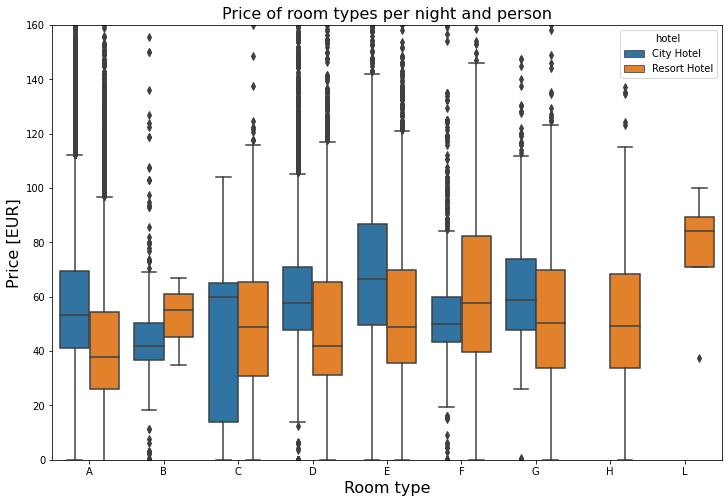

In [ ]:
data['adr_Updated']=data['adr']/(data['adults']+data['children'])
valid_guest = data.loc[data['is_canceled']==0]
prices = valid_guest[['hotel','reserved_room_type','adr_Updated']].sort_values('reserved_room_type')

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
            y='adr_Updated',
            hue='hotel',
            data=prices
            )
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)

plt.ylim(0, 160) # it adjusts the size of the y-axis of bar chart
plt.show()

In [ ]:
prices = valid_guest[['hotel', 'reserved_room_type', 'adr_Updated']].sort_values('reserved_room_type')
prices

,hotel,reserved_room_type,adr_Updated
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40
...,...,...,...
24110,Resort Hotel,H,34.00
354,Resort Hotel,L,37.50
15855,Resort Hotel,L,86.00
911,Resort Hotel,L,100.00


In [ ]:
prices_C=prices[prices['reserved_room_type']=='C']
prices_C

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.000000
99432,City Hotel,C,65.000000
99431,City Hotel,C,65.000000
101137,City Hotel,C,55.000000
0,Resort Hotel,C,0.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [ ]:
prices_City=prices_C[prices_C['hotel']=='City Hotel']
prices_Resort=prices_C[prices_C['hotel']=='Resort Hotel']

In [ ]:
prices_City

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.0
99432,City Hotel,C,65.0
99431,City Hotel,C,65.0
101137,City Hotel,C,55.0
82509,City Hotel,C,0.0
82508,City Hotel,C,0.0
44693,City Hotel,C,65.0
80557,City Hotel,C,18.5


In [ ]:
prices_Resort

,hotel,reserved_room_type,adr_Updated
0,Resort Hotel,C,0.000000
34951,Resort Hotel,C,30.250000
15955,Resort Hotel,C,47.366667
25990,Resort Hotel,C,62.166667
15960,Resort Hotel,C,90.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [ ]:
prices_City.describe()

,adr_Updated
count,8.00000
mean,46.56250
std,36.86601
min,0.00000
25%,13.87500
50%,60.00000
75%,65.00000
max,104.00000


In [ ]:
prices_Resort.describe()

,adr_Updated
count,615.000000
mean,50.549085
std,27.821397
min,0.000000
25%,31.000000
50%,49.000000
75%,65.562500
max,171.000000


**How long do people stay at the hotels?**

In [ ]:
df3 = data[data['is_canceled']==0]
df3['total_nights'] = df3['stays_in_weekend_nights'] + df3['stays_in_week_nights']

<ipython-input-77-b360c91b4302>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015,0.000000,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015,0.000000,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015,75.000000,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015,75.000000,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,07-03-2015,49.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,...,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,09-06-2017,48.070000,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,...,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,09-07-2017,75.143333,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,...,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,09-07-2017,78.855000,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,09-07-2017,52.200000,7


In [ ]:
df4 = df3[['total_nights','hotel','is_canceled']]

In [ ]:
df4

,total_nights,hotel,is_canceled
0,0,Resort Hotel,0
1,0,Resort Hotel,0
2,1,Resort Hotel,0
3,1,Resort Hotel,0
4,2,Resort Hotel,0
...,...,...,...
119385,7,City Hotel,0
119386,7,City Hotel,0
119387,7,City Hotel,0
119388,7,City Hotel,0


In [ ]:
hotel_stay = df4.groupby(['total_nights','hotel']).agg('count').reset_index()
hotel_stay

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [ ]:
hotel_stay = hotel_stay.rename(columns={'is_canceled':'Number of stays'})
hotel_stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [ ]:
hotel_stay_r=hotel_stay[hotel_stay['hotel']=='Resort Hotel']
hotel_stay_r

,total_nights,hotel,Number of stays
1,0,Resort Hotel,371
3,1,Resort Hotel,6579
5,2,Resort Hotel,4488
7,3,Resort Hotel,3828
9,4,Resort Hotel,3321
11,5,Resort Hotel,1899
13,6,Resort Hotel,1205
15,7,Resort Hotel,4434
17,8,Resort Hotel,509
19,9,Resort Hotel,408


In [ ]:
hotel_stay_c=hotel_stay[hotel_stay['hotel']=='City Hotel']
hotel_stay_c

,total_nights,hotel,Number of stays
0,0,City Hotel,251
2,1,City Hotel,9155
4,2,City Hotel,10983
6,3,City Hotel,11889
8,4,City Hotel,7694
10,5,City Hotel,3210
12,6,City Hotel,1111
14,7,City Hotel,1245
16,8,City Hotel,205
18,9,City Hotel,119


In [ ]:
trace = go.Bar(
    x=hotel_stay_r['total_nights'],
    y=hotel_stay_r['Number of stays'],
    name='Resort Stay'
)

trace1 = go.Bar(
    x=hotel_stay_c['total_nights'],
    y=hotel_stay_c['Number of stays'],
    name='City Stay'
)

data5 = [trace,trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig=go.Figure(data=data5, layout=layout)
pyo.plot(fig)

'temp-plot.html'

**Bookings by Market Segment**

In [ ]:
segments = data['market_segment'].value_counts()
segments

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
SC                   2
Name: market_segment, dtype: int64

In [ ]:
# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title='Bookings per market segment',
             template='seaborn'
             )
fig.update_traces(rotation=-90, textinfo='percent+label')
fig.show()

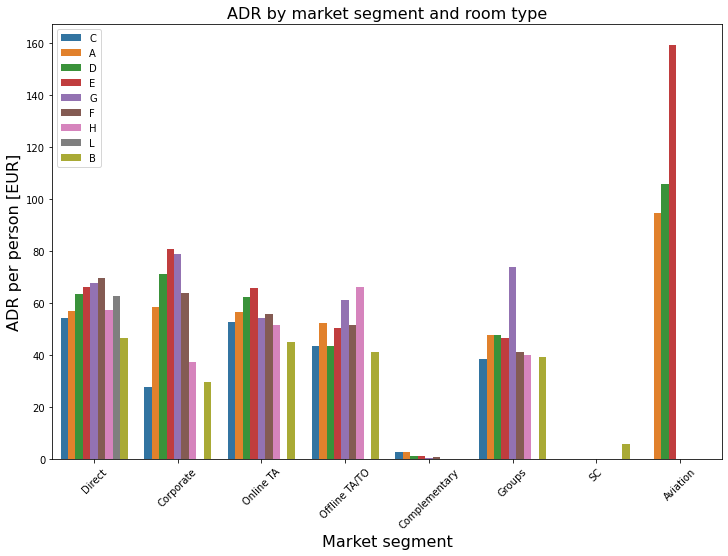

In [ ]:
# bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='market_segment',
            y='adr_Updated',
            hue='reserved_room_type',
            data=data,
            ci=None
            )
plt.title('ADR by market segment and room type', fontsize=16)
plt.xlabel('Market segment', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('ADR per person [EUR]', fontsize=16)
plt.legend(loc='upper left')
plt.show()

**How many bookings were canceled?**

In [ ]:
# Cancel=data['is_canceled'].sum()
Cancel=data['is_canceled']==1

In [ ]:
cancel = Cancel.sum()

In [ ]:
resort_cancelation = data.loc[data['hotel'] == 'Resort Hotel']['is_canceled'].sum()
city_cancelation = data.loc[data['hotel'] == 'City Hotel']['is_canceled'].sum()

In [ ]:
resort_cancelation

11120

In [ ]:
city_cancelation

33079

In [ ]:
11120+33079

44199

In [ ]:
print(f'Total Booking Canceled : {cancel} .')
print(f'Total Resort Hotel Booking Canceled : {resort_cancelation} .')
print(f'Total City Hotel Booking Canceled : {city_cancelation} .')

Total Booking Canceled : 44199 .
Total Resort Hotel Booking Canceled : 11120 .
Total City Hotel Booking Canceled : 33079 .


**Which month have the highest number of cancelations?**

In [ ]:
res_book_per_month = data.loc[(data['hotel'] == 'Resort Hotel')].groupby('arrival_date_month')['hotel'].count()
res_cancel_per_month = data.loc[(data['hotel'] == 'Resort Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

city_book_per_month = data.loc[(data['hotel'] == 'City Hotel')].groupby('arrival_date_month')['hotel'].count()
city_cancel_per_month = data.loc[(data['hotel'] == 'City Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

res_cancel_data = pd.DataFrame({'Hotel': 'Resort Hotel',
                                'Month': list(res_book_per_month.index),
                                'Bookings': list(res_book_per_month.values),
                                'Cancelations': list(res_cancel_per_month.values)
                                })

city_cancel_data = pd.DataFrame({'Hotel': 'City Hotel',
                                'Month': list(city_book_per_month.index),
                                'Bookings': list(city_book_per_month.values),
                                'Cancelations': list(city_cancel_per_month.values)
                                })

full_cancel_data = pd.concat([res_cancel_data, city_cancel_data], ignore_index=True)

In [ ]:
res_book_per_month

arrival_date_month
April        3609
August       4894
December     2645
February     3102
January      2191
July         4573
June         3044
March        3334
May          3559
November     2435
October      3553
September    3108
Name: hotel, dtype: int64

In [ ]:
res_cancel_per_month

arrival_date_month
April        1059
August       1637
December      631
February      794
January       325
July         1436
June         1007
March         763
May          1024
November      460
October       978
September    1006
Name: is_canceled, dtype: int64

In [ ]:
city_book_per_month

arrival_date_month
April        7469
August       8967
December     4114
February     4950
January      3730
July         8071
June         7885
March        6434
May          8221
November     4336
October      7594
September    7392
Name: hotel, dtype: int64

In [ ]:
city_cancel_per_month

arrival_date_month
April        3459
August       3600
December     1737
February     1899
January      1481
July         3301
June         3527
March        2385
May          3653
November     1660
October      3268
September    3109
Name: is_canceled, dtype: int64

In [ ]:
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3334,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [ ]:
city_cancel_data

,Hotel,Month,Bookings,Cancelations
0,City Hotel,April,7469,3459
1,City Hotel,August,8967,3600
2,City Hotel,December,4114,1737
3,City Hotel,February,4950,1899
4,City Hotel,January,3730,1481
5,City Hotel,July,8071,3301
6,City Hotel,June,7885,3527
7,City Hotel,March,6434,2385
8,City Hotel,May,8221,3653
9,City Hotel,November,4336,1660


In [ ]:
full_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3334,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [ ]:
import sort_dataframeby_monthorweek as sd
res_cancel_data = sd.Sort_Dataframeby_Month(df=res_cancel_data, monthcolumnname='Month')
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2191,325
1,Resort Hotel,February,3102,794
2,Resort Hotel,March,3334,763
3,Resort Hotel,April,3609,1059
4,Resort Hotel,May,3559,1024
5,Resort Hotel,June,3044,1007
6,Resort Hotel,July,4573,1436
7,Resort Hotel,August,4894,1637
8,Resort Hotel,September,3108,1006
9,Resort Hotel,October,3553,978


In [ ]:
import sort_dataframeby_monthorweek as sd
city_cancel_data = sd.Sort_Dataframeby_Month(df=city_cancel_data, monthcolumnname='Month')
city_cancel_data

,Hotel,Month,Bookings,Cancelations
0,City Hotel,January,3730,1481
1,City Hotel,February,4950,1899
2,City Hotel,March,6434,2385
3,City Hotel,April,7469,3459
4,City Hotel,May,8221,3653
5,City Hotel,June,7885,3527
6,City Hotel,July,8071,3301
7,City Hotel,August,8967,3600
8,City Hotel,September,7392,3109
9,City Hotel,October,7594,3268


In [ ]:
import sort_dataframeby_monthorweek as sd
full_cancel_data = sd.Sort_Dataframeby_Month(df=full_cancel_data, monthcolumnname='Month')
full_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2191,325
1,City Hotel,January,3730,1481
2,Resort Hotel,February,3102,794
3,City Hotel,February,4950,1899
4,Resort Hotel,March,3334,763
5,City Hotel,March,6434,2385
6,Resort Hotel,April,3609,1059
7,City Hotel,April,7469,3459
8,Resort Hotel,May,3559,1024
9,City Hotel,May,8221,3653


In [ ]:
# plt.figure(figsize=(12,8))

trace = go.Bar(
    x=res_cancel_data['Month'],
    y=res_cancel_data['Cancelations'],
    name='Rst Cancelled'
)

trace1 = go.Bar(
    x=city_cancel_data['Month'],
    y=city_cancel_data['Cancelations'],
    name='Cty Cancelled'
)

data6 = [trace, trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig = go.Figure(data=data6, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [ ]:
### Create a summary on the analysis you have done.
### Create a dashboard(using Tableau, Power BI, etc) and provide it to the business users.